# 🧾 Superstore Sales Analysis using Python & Pandas
This notebook cleans and prepares the Superstore dataset for Power BI visualization.

In [27]:
import pandas as pd
# Load dataset
df = pd.read_csv("D:/Data Analytics Projects/Sales_insights_project/data/Superstore_sales.csv")
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11-08-2016,11-11-2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11-08-2016,11-11-2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,06-12-2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,10-11-2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,10-11-2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [29]:
# Check basic information about dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9994 non-null   int64  
 1   Order ID       9994 non-null   object 
 2   Order Date     9994 non-null   object 
 3   Ship Date      9994 non-null   object 
 4   Ship Mode      9994 non-null   object 
 5   Customer ID    9994 non-null   object 
 6   Customer Name  9994 non-null   object 
 7   Segment        9994 non-null   object 
 8   Country        9994 non-null   object 
 9   City           9994 non-null   object 
 10  State          9994 non-null   object 
 11  Postal Code    9994 non-null   int64  
 12  Region         9994 non-null   object 
 13  Product ID     9994 non-null   object 
 14  Category       9994 non-null   object 
 15  Sub-Category   9994 non-null   object 
 16  Product Name   9994 non-null   object 
 17  Sales          9994 non-null   float64
 18  Quantity

In [41]:
# Clean column names
df.columns = df.columns.str.strip().str.replace(' ', '_').str.lower()

# Check again
df.columns


Index(['row_id', 'order_id', 'order_date', 'ship_date', 'ship_mode',
       'customer_id', 'customer_name', 'segment', 'country', 'city', 'state',
       'postal_code', 'region', 'product_id', 'category', 'sub-category',
       'product_name', 'sales', 'quantity', 'discount', 'profit'],
      dtype='object')

In [45]:
print(df.columns)


Index(['row_id', 'order_id', 'order_date', 'ship_date', 'ship_mode',
       'customer_id', 'customer_name', 'segment', 'country', 'city', 'state',
       'postal_code', 'region', 'product_id', 'category', 'sub-category',
       'product_name', 'sales', 'quantity', 'discount', 'profit'],
      dtype='object')


In [49]:
df['order_date'] = pd.to_datetime(df['order_date'], errors='coerce')
df['order_date']

0      2016-11-08
1      2016-11-08
2      2016-06-12
3      2015-10-11
4      2015-10-11
          ...    
9989          NaT
9990          NaT
9991          NaT
9992          NaT
9993   2017-05-04
Name: order_date, Length: 9994, dtype: datetime64[ns]

In [35]:
# Check for missing values
df.isnull().sum()

Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
dtype: int64

In [37]:
# Summary statistics
df.describe()

,Row ID,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,4997.500000,55190.379428,229.858001,3.789574,0.156203,28.656896
std,2885.163629,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1.000000,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,2499.250000,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,4997.500000,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,7495.750000,90008.000000,209.940000,5.000000,0.200000,29.364000
max,9994.000000,99301.000000,22638.480000,14.000000,0.800000,8399.976000


In [57]:
if 'revenue' not in df.columns:
    df['revenue'] = df['sales'] * df['quantity']
df['revenue']

0        523.9200
1       2195.8200
2         29.2400
3       4787.8875
4         44.7360
          ...    
9989      75.7440
9990     183.9200
9991     517.1520
9992     118.4000
9993     486.3200
Name: revenue, Length: 9994, dtype: float64

In [65]:
df['year'] = df['order_date'].dt.year
df['month'] = df['order_date'].dt.month_name()


In [69]:
df['month'] 


0       November
1       November
2           June
3        October
4        October
          ...   
9989         NaN
9990         NaN
9991         NaN
9992         NaN
9993         May
Name: month, Length: 9994, dtype: object

In [71]:
df['year']

0       2016.0
1       2016.0
2       2016.0
3       2015.0
4       2015.0
         ...  
9989       NaN
9990       NaN
9991       NaN
9992       NaN
9993    2017.0
Name: year, Length: 9994, dtype: float64

In [73]:
df.head()
df.info()
df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 24 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   row_id         9994 non-null   int64         
 1   order_id       9994 non-null   object        
 2   order_date     4042 non-null   datetime64[ns]
 3   ship_date      9994 non-null   object        
 4   ship_mode      9994 non-null   object        
 5   customer_id    9994 non-null   object        
 6   customer_name  9994 non-null   object        
 7   segment        9994 non-null   object        
 8   country        9994 non-null   object        
 9   city           9994 non-null   object        
 10  state          9994 non-null   object        
 11  postal_code    9994 non-null   int64         
 12  region         9994 non-null   object        
 13  product_id     9994 non-null   object        
 14  category       9994 non-null   object        
 15  sub-category   9994 n

,row_id,order_date,postal_code,sales,quantity,discount,profit,revenue,year
count,9994.000000,4042,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000,4042.000000
mean,4997.500000,2016-04-27 22:18:49.341910016,55190.379428,229.858001,3.789574,0.156203,28.656896,1149.495905,2015.723404
min,1.000000,2014-01-03 00:00:00,1040.000000,0.444000,1.000000,0.000000,-6599.978000,0.444000,2014.000000
25%,2499.250000,2015-05-09 06:00:00,23223.000000,17.280000,2.000000,0.000000,1.728750,48.693500,2015.000000
50%,4997.500000,2016-07-01 00:00:00,56430.500000,54.490000,3.000000,0.200000,8.666500,183.680000,2016.000000
75%,7495.750000,2017-06-01 00:00:00,90008.000000,209.940000,5.000000,0.200000,29.364000,763.201500,2017.000000
max,9994.000000,2017-12-11 00:00:00,99301.000000,22638.480000,14.000000,0.800000,8399.976000,135830.880000,2017.000000
std,2885.163629,NaN,32063.693350,623.245101,2.225110,0.206452,234.260108,3898.666090,1.119750


In [77]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd


In [79]:
print("Rows:", df.shape[0])
print("Columns:", df.shape[1])
print("\nSummary:")
display(df.describe())

print("\nMissing values:")
display(df.isnull().sum())


Rows: 9994
Columns: 24

Summary:


,row_id,order_date,postal_code,sales,quantity,discount,profit,revenue,year
count,9994.000000,4042,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000,4042.000000
mean,4997.500000,2016-04-27 22:18:49.341910016,55190.379428,229.858001,3.789574,0.156203,28.656896,1149.495905,2015.723404
min,1.000000,2014-01-03 00:00:00,1040.000000,0.444000,1.000000,0.000000,-6599.978000,0.444000,2014.000000
25%,2499.250000,2015-05-09 06:00:00,23223.000000,17.280000,2.000000,0.000000,1.728750,48.693500,2015.000000
50%,4997.500000,2016-07-01 00:00:00,56430.500000,54.490000,3.000000,0.200000,8.666500,183.680000,2016.000000
75%,7495.750000,2017-06-01 00:00:00,90008.000000,209.940000,5.000000,0.200000,29.364000,763.201500,2017.000000
max,9994.000000,2017-12-11 00:00:00,99301.000000,22638.480000,14.000000,0.800000,8399.976000,135830.880000,2017.000000
std,2885.163629,NaN,32063.693350,623.245101,2.225110,0.206452,234.260108,3898.666090,1.119750



Missing values:


row_id              0
order_id            0
order_date       5952
ship_date           0
ship_mode           0
customer_id         0
customer_name       0
segment             0
country             0
city                0
state               0
postal_code         0
region              0
product_id          0
category            0
sub-category        0
product_name        0
sales               0
quantity            0
discount            0
profit              0
revenue             0
year             5952
month            5952
dtype: int64

In [81]:
total_sales = df['sales'].sum()
total_profit = df['profit'].sum()
avg_discount = df['discount'].mean()

print(f"💰 Total Sales: ${total_sales:,.2f}")
print(f"📈 Total Profit: ${total_profit:,.2f}")
print(f"🏷️ Average Discount: {avg_discount:.2%}")


💰 Total Sales: $2,297,200.86
📈 Total Profit: $286,397.02
🏷️ Average Discount: 15.62%


Sales by Region

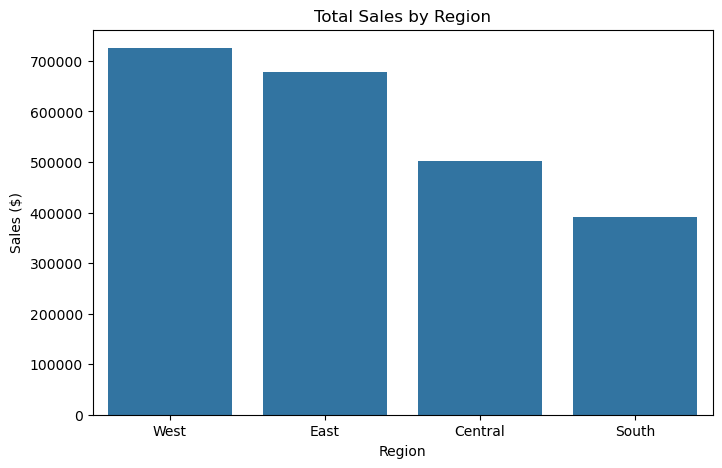

In [83]:
region_sales = df.groupby('region')['sales'].sum().sort_values(ascending=False)

plt.figure(figsize=(8,5))
sns.barplot(x=region_sales.index, y=region_sales.values)
plt.title("Total Sales by Region")
plt.ylabel("Sales ($)")
plt.xlabel("Region")
plt.show()


Category and Sub-Category Analysis

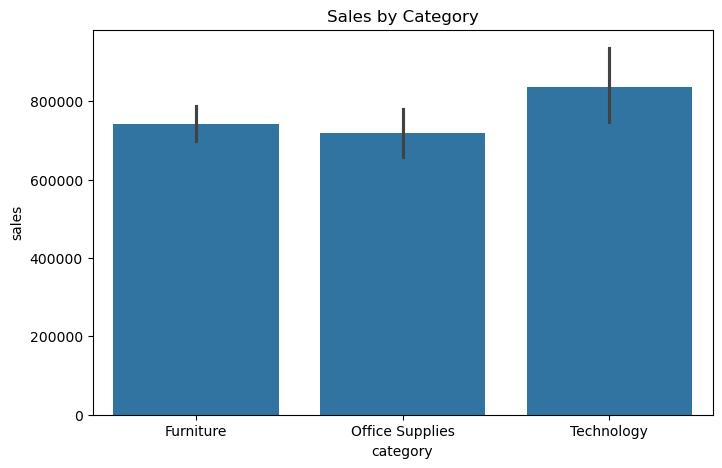

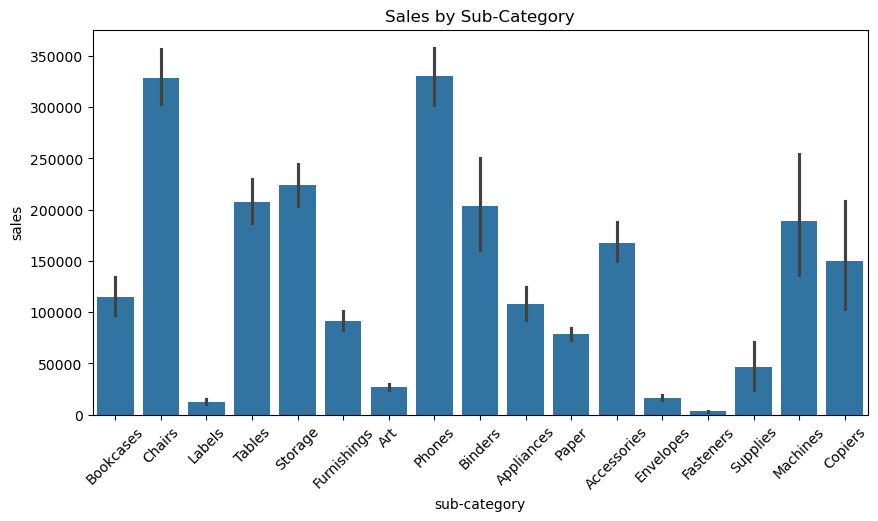

In [89]:
plt.figure(figsize=(8,5))
sns.barplot(x='category', y='sales', data=df, estimator=sum)
plt.title("Sales by Category")
plt.show()

plt.figure(figsize=(10,5))
sns.barplot(x='sub-category', y='sales', data=df, estimator=sum)
plt.title("Sales by Sub-Category")
plt.xticks(rotation=45)
plt.show()


Profit by Region

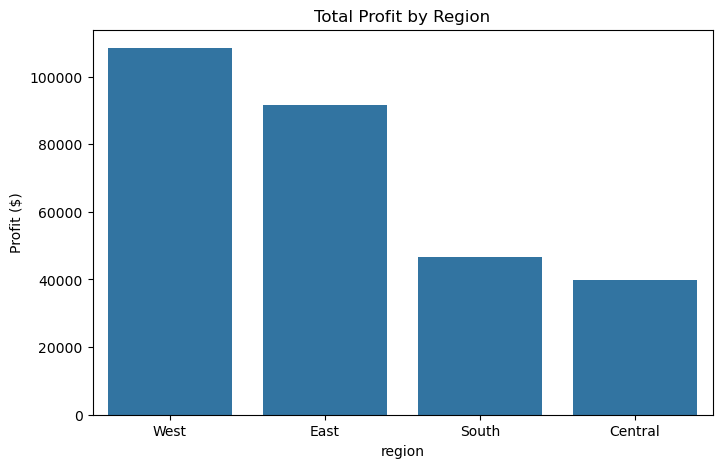

In [92]:
region_profit = df.groupby('region')['profit'].sum().sort_values(ascending=False)

plt.figure(figsize=(8,5))
sns.barplot(x=region_profit.index, y=region_profit.values)
plt.title("Total Profit by Region")
plt.ylabel("Profit ($)")
plt.show()


Sales vs Profit Relationship

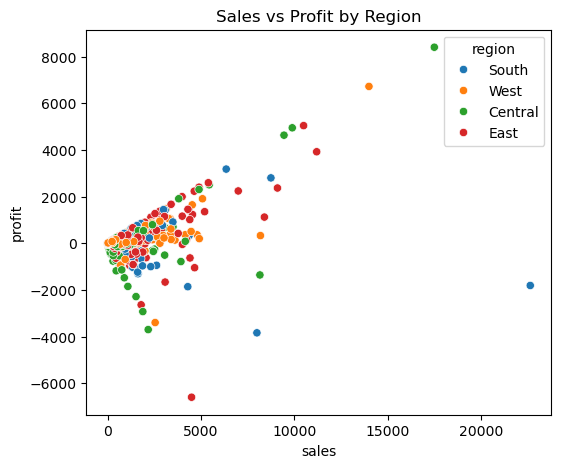

In [95]:
plt.figure(figsize=(6,5))
sns.scatterplot(x='sales', y='profit', data=df, hue='region')
plt.title("Sales vs Profit by Region")
plt.show()


Monthly Sales Trend

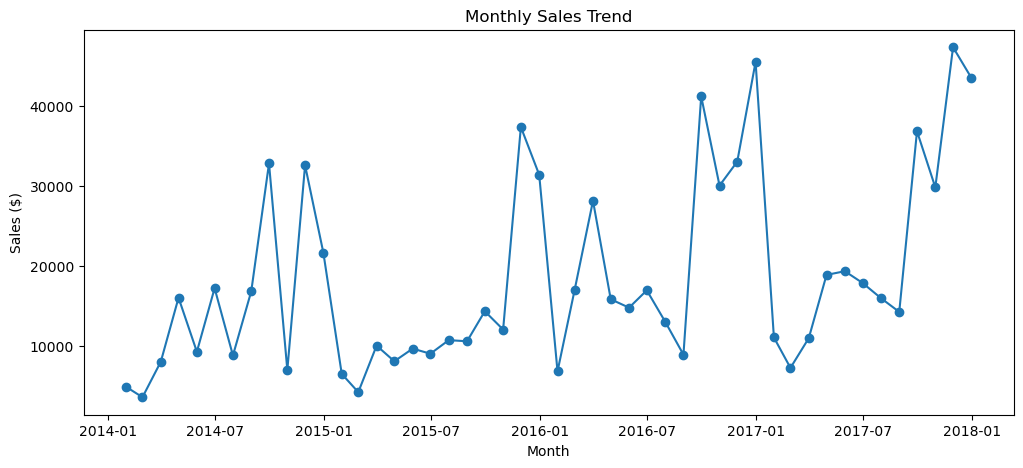

In [100]:
monthly_sales = df.groupby(pd.Grouper(key='order_date', freq='ME'))['sales'].sum()

plt.figure(figsize=(12,5))
plt.plot(monthly_sales.index, monthly_sales.values, marker='o')
plt.title("Monthly Sales Trend")
plt.ylabel("Sales ($)")
plt.xlabel("Month")
plt.show()


Top 10 Customers

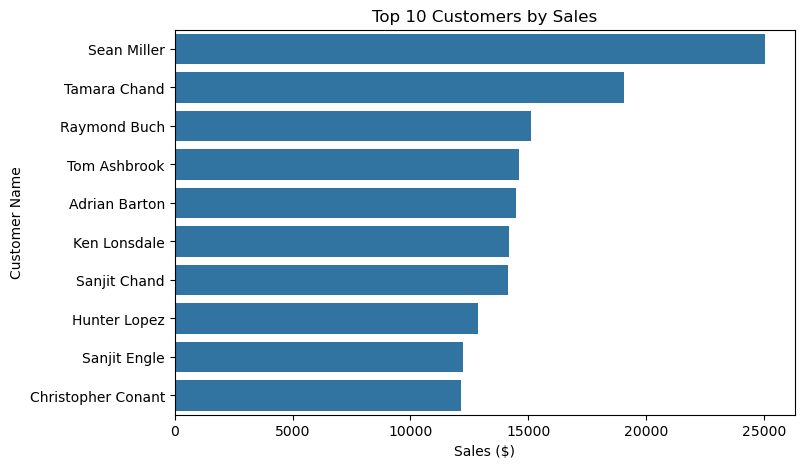

In [103]:
top_customers = df.groupby('customer_name')['sales'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(8,5))
sns.barplot(x=top_customers.values, y=top_customers.index)
plt.title("Top 10 Customers by Sales")
plt.xlabel("Sales ($)")
plt.ylabel("Customer Name")
plt.show()


In [111]:
import os

# Create folder if it doesn't exist
os.makedirs('data', exist_ok=True)




In [113]:
df.to_csv('data/superstore_sales_cleaned.csv', index=False)
print('✅ Cleaned dataset saved successfully!')

✅ Cleaned dataset saved successfully!
